In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1 行 ≒ 1 PropsSI 呼び出し
df = pd.read_csv("../props_usage.csv")

# 型を明示しておくと後の round/カテゴリ処理が速い
df["T_K"]  = df["T_K"].astype(np.float32)
df["P_Pa"] = df["P_Pa"].astype(np.float32)


In [6]:
N = 20                      # 上位 20 個
top_calls = (df.groupby(["fluid", "prop", "T_K", "P_Pa"])
               .size()
               .reset_index(name="count")
               .sort_values("count", ascending=False)
               .head(N))

display(top_calls)


,fluid,prop,T_K,P_Pa,count
290617,co2,L,291.149994,101325.0,18315
935171,nitrogen,L,291.149994,101325.0,18315
508395,co2,V,291.149994,101325.0,18315
1152949,nitrogen,V,291.149994,101325.0,18315
486045,co2,V,289.142426,101325.0,990
1130599,nitrogen,V,289.142426,101325.0,990
268723,co2,L,289.142426,101325.0,990
913277,nitrogen,L,289.142426,101325.0,990
486004,co2,V,289.141174,101325.0,976
1130558,nitrogen,V,289.141174,101325.0,976


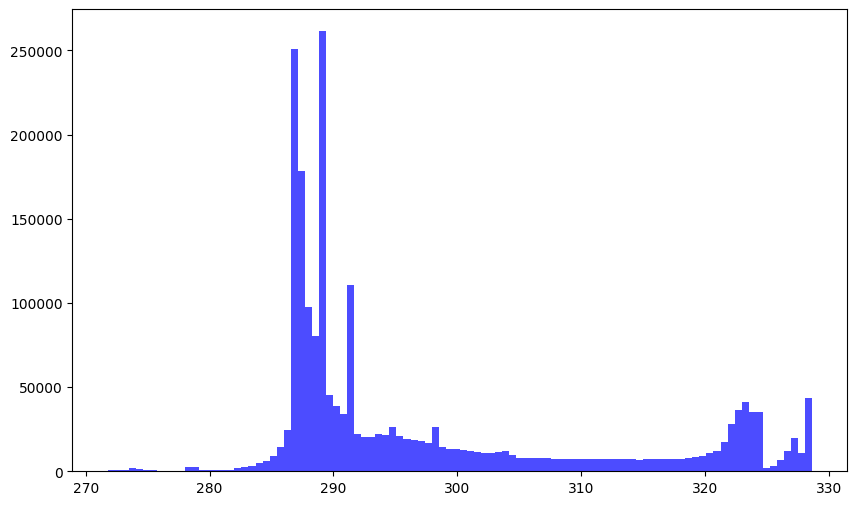

In [14]:
# T_Kのヒストグラム確認
plt.figure(figsize=(10, 6))
plt.hist(df["T_K"], bins=100, color="blue", alpha=0.7)
plt.show()

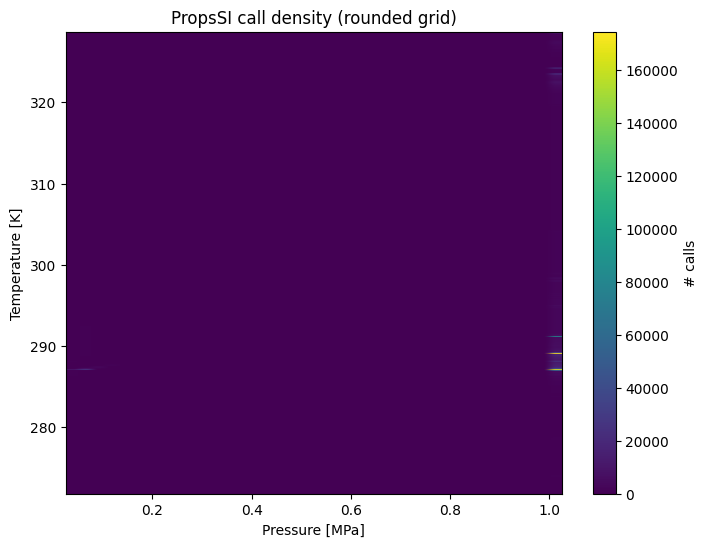

In [7]:
# ◎お好みで丸め幅 (resolution) を調整
RES_T = 0.5       # K
RES_P = 2500      # Pa

df["T_r"] = df["T_K"].round(1)               # 0.1 K 単位
df["P_r"] = (df["P_Pa"]/RES_P).round(0)*RES_P

pivot = (df.groupby(["T_r", "P_r"])
           .size()
           .unstack(fill_value=0)
           .sort_index())    # T 行,  P 列

fig = plt.figure(figsize=(8, 6))
plt.imshow(pivot,
           origin="lower",
           aspect="auto",
           extent=[pivot.columns.min()/1e5,
                   pivot.columns.max()/1e5,
                   pivot.index.min(), pivot.index.max()])
plt.colorbar(label="# calls")
plt.xlabel("Pressure [MPa]")
plt.ylabel("Temperature [K]")
plt.title("PropsSI call density (rounded grid)")
plt.show()


,prop,fluid,count
6,V,co2,397363
7,V,nitrogen,397363
4,L,co2,394160
5,L,nitrogen,394160
2,D,co2,125323
3,D,nitrogen,125323
0,CPMASS,co2,122120
1,CPMASS,nitrogen,122120


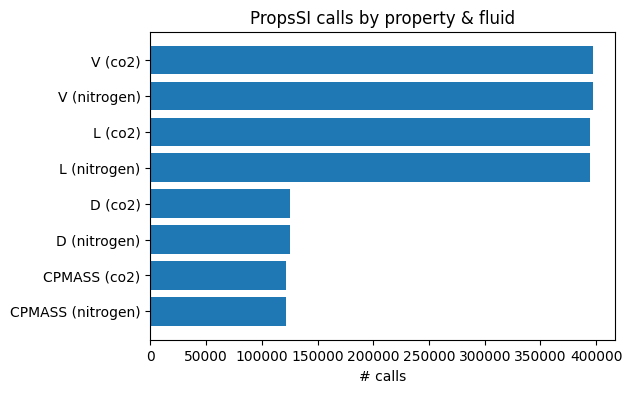

In [8]:
# prop × fluid 単位の総回数
prop_cnt = (df.groupby(["prop", "fluid"])
              .size()
              .reset_index(name="count")
              .sort_values("count", ascending=False))

display(prop_cnt)

# 横棒グラフ
fig = plt.figure(figsize=(6, 4))
plt.barh(prop_cnt["prop"] + " (" + prop_cnt["fluid"] + ")", prop_cnt["count"])
plt.xlabel("# calls")
plt.title("PropsSI calls by property & fluid")
plt.gca().invert_yaxis()
plt.show()


In [11]:
df

,timestamp,fluid,prop,T_K,P_Pa,T_r,P_r
0,2025-05-31T02:49:43.293972,co2,L,291.149994,101325.0,291.200012,102500.0
1,2025-05-31T02:49:43.293972,nitrogen,L,291.149994,101325.0,291.200012,102500.0
2,2025-05-31T02:49:43.293972,co2,V,291.149994,101325.0,291.200012,102500.0
3,2025-05-31T02:49:43.293972,nitrogen,V,291.149994,101325.0,291.200012,102500.0
4,2025-05-31T02:49:43.293972,co2,L,291.149994,101325.0,291.200012,102500.0
...,...,...,...,...,...,...,...
2077927,2025-05-31T02:53:46.886027,nitrogen,CPMASS,286.127502,101325.0,286.100006,102500.0
2077928,2025-05-31T02:53:46.886027,co2,L,286.127502,101325.0,286.100006,102500.0
2077929,2025-05-31T02:53:46.886027,nitrogen,L,286.127502,101325.0,286.100006,102500.0
2077930,2025-05-31T02:53:46.886027,co2,V,286.127502,101325.0,286.100006,102500.0
